In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

pd.set_option('display.max_columns', None)

# Delivery Times - Data Analysis Project

In [30]:
df = pd.read_csv('final_dataset.csv')

# SQL Connection
# Connecting to in-memory SQLite database
conn = sqlite3.connect(":memory:")

df.to_sql("Deliveries", conn, index=False, if_exists="replace")

print(df.columns)
df.head()

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)',
       'time (minutes)', 'distance (km)'],
      dtype='object')


,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),time (minutes),distance (km)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24,24,3.025149
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33,33,20.183530
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26,26,1.552758
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21,21,7.790401
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30,30,6.210138


In [17]:
df.describe()

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,time (minutes),distance (km)
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,17.017729,70.231332,17.465186,70.845702,1.023359,26.294607,99.303911
std,8.185109,22.883647,7.335122,21.118812,0.839065,9.383806,1099.731281
min,-30.905562,-88.366217,0.010000,0.010000,0.000000,10.000000,1.465067
25%,12.933284,73.170000,12.988453,73.280000,0.000000,19.000000,4.663493
50%,18.546947,75.898497,18.633934,76.002574,1.000000,26.000000,9.264281
75%,22.728163,78.044095,22.785049,78.107044,2.000000,32.000000,13.763977
max,30.914057,88.433452,31.054057,88.563452,3.000000,54.000000,19692.674606


### What is the average delivery time when weather conditions are unfavorable (e.g., Stormy, Fog, Sandstorms, Windy)?

In [25]:
# Visualize all values for weather conditions
df['Weatherconditions'].unique()

# Define what categorizes as 'unfavorable'
unfavorable = ['conditions Stormy', 'conditions Sandstorms']

# filter the new_dataframe
unf_weather = df[df['Weatherconditions'].isin(unfavorable)]

# Print overall average when conditions are unfavorable
print(f"When conditions are unfavorable, the average delivery time is: {round(unf_weather['time (minutes)'].mean(),2)} minutes. \n")

# Displaying average deliveries per group
unf_weather_final = unf_weather.groupby('Weatherconditions')[['time (minutes)']].mean()

unf_weather_final2 = unf_weather.groupby('Weatherconditions').agg({'time (minutes)': 'mean', 'ID': 'count'})

# change name of columns after transformations
unf_weather_final2.rename(columns={'time (minutes)': 'Average Delivery Time', 'ID':'Count of Orders'}, inplace=True)


unf_weather_final2

When conditions are unfavorable, the average delivery time is: 25.87 minutes. 



,Average Delivery Time,Count of Orders
Weatherconditions,,
conditions Sandstorms,25.875517,7495
conditions Stormy,25.870815,7586


In [34]:
# Get column names of the table
cursor = conn.cursor()
cursor.execute("PRAGMA table_info(Deliveries)")
columns = [col[1] for col in cursor.fetchall()]
print(columns)

['ID', 'Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density', 'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)', 'time (minutes)', 'distance (km)']


In [36]:
############ SQL ############

query = " SELECT Weatherconditions, AVG('time (minutes)') AS avg FROM Deliveries GROUP BY Weatherconditions"

result = pd.read_sql(query, conn)

print(result.head())

# conn.close()

       Weatherconditions  avg
0      conditions Cloudy  0.0
1         conditions Fog  0.0
2         conditions NaN  0.0
3  conditions Sandstorms  0.0
4      conditions Stormy  0.0


### Which type of vehicle has the highest average delivery time?

In [43]:
# Investigating vehicle types
df['Type_of_vehicle'].unique()

time_vehicle = df.groupby('Type_of_vehicle').agg({'time (minutes)':'mean'})

time_vehicle.sort_values(by='time (minutes)', ascending=False, inplace=True)

time_vehicle

,time (minutes)
Type_of_vehicle,
motorcycle,27.605674
bicycle,26.426471
scooter,24.480754
electric_scooter,24.470110


### What is the correlation between traffic density and delivery time?

In [54]:
# Investigating traffic density column
df[['Road_traffic_density']].head()

# seems that they are categorical variables
traffic_delivery = df.groupby('Road_traffic_density')[['time (minutes)']].mean()

traffic_delivery.sort_values(by='time (minutes)', ascending=False, inplace=True)

# it does seem to have strong correlation
# df['Road_traffic_density'].corr(df['time (minutes)']) wont work since density is categorical variable
df['Road_traffic_density_numeric'] = df['Road_traffic_density'].astype('category').cat.codes
df['Road_traffic_density_numeric'].corr(df['time (minutes)'])

# ANOVA to see whether traffic density results in significant differences in delivery time
import scipy.stats as stats

groups = [df[df['Road_traffic_density'] == level]['time (minutes)'] for level in df['Road_traffic_density'].unique()]
stats.f_oneway(*groups)

# Since p_value < 0.05, reject H0, traffic density does affect delivery time)

F_onewayResult(statistic=2550.2956907866765, pvalue=0.0)

### What is the most common type of order in urban areas?

In [63]:
# Before filtering based on the area, let's analyze the types of order
df['Type_of_order'].unique()
# We have 4 types of order -> ['Snack ', 'Drinks ', 'Buffet ', 'Meal ']

# Let's filter by urban area
common_urban_df = df[df['City'] == 'Urban ']

common_urban = common_urban_df.groupby('Type_of_order').agg({'ID':'count'})

common_urban.sort_values(by="ID", ascending=False, inplace=True)

# Response -> Snacks

common_urban

,ID
Type_of_order,
Snack,2576
Drinks,2567
Buffet,2508
Meal,2485


### Find the delivery person with the highest average rating in metropolitan areas

In [71]:
# Get Rid of spaces

# Convert Ratings to Numeric

# Filter dataframe based on metropolitan area
metropolitan_df = df[df['City'] == 'Metropolitian']

# Making sure we drop rows that doesn't have ratings
metropolitan_df['Delivery_person_Ratings'].dropna(inplace=True)

#highest_rating = metropolitan_df.groupby('Delivery_person_ID').agg({'Delivery_person_Ratings':'mean'})

#highest_rating.sort_values(by='Delivery_person_Ratings', ascending=False, inplace=True)

#highest_rating

/var/folders/7x/mwsg2nfd0gsf5h73ty0mnrb80000gn/T/ipykernel_42075/2691021446.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metropolitan_df['Delivery_person_Ratings'].dropna(inplace=True)


### Calculate the average delivery time per city and visualize it using a bar chart

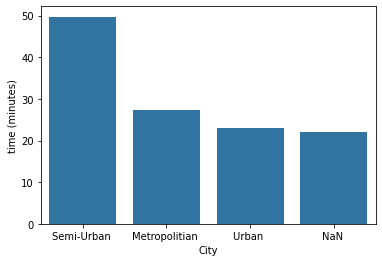

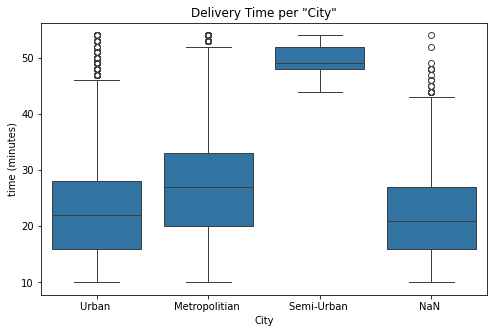

,time (minutes)
City,
Semi-Urban,49.731707
Metropolitian,27.315226
Urban,22.984017
NaN,22.058333


In [92]:
# City not a part of the variables. But we can see the average delivery time Urban vs Metropolitan and then visualize 

avg_deliv_time = df.groupby('City').agg({'time (minutes)':'mean'})
avg_deliv_time.sort_values(by='time (minutes)', ascending=False, inplace=True)

# Seaborn simple bar chart
#sns.barplot(avg_deliv_time, x='City', y='time (minutes)')
sns.barplot(avg_deliv_time, x='City', y='time (minutes)')
# sns.boxplot(df, x='City', y='time (minutes)')

# matplotlib simple bar chart
plt.figure(figsize=(8,5))
sns.boxplot(df, x='City', y='time (minutes)')
plt.title('Delivery Time per "City"')
plt.show()

avg_deliv_time

### Which factor (weather, traffic, vehicle type) impacts delivery time the most?

### What is the standard deviation of delivery times across different cities?

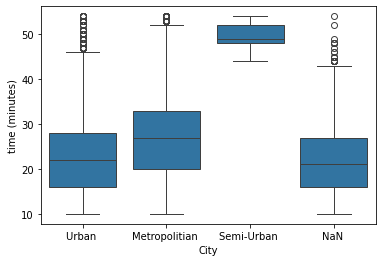

In [99]:
std_delivery = df.groupby('City').agg({'time (minutes)': 'std'})

std_delivery

# Visualizing the boxplots
plt.figure(figsize=(6,4))
sns.boxplot(df, x='City', y='time (minutes)')
plt.show()


### Calculate the rolling average delivery time per 3 days windows of the TOP 3 rated drivers

In [118]:
# We now that Rating is not numeric. Convert to numeric
df['Delivery_person_Ratings'] = pd.to_numeric(df['Delivery_person_Ratings'], errors='coerce') # coerce ensures non-numeric values (like 'NaN', 'N/A') are converted to NaN

# converting date to datetime
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

# Determine the TOP 5 rated drivers
rated_drivers = df.groupby('Delivery_person_ID', as_index=False).agg({'Delivery_person_Ratings':'mean'})

rated_drivers.sort_values(by='Delivery_person_Ratings', ascending=False, inplace=True)

# Now that I know the TOP 3 rated drivers, save them to a list to filter the overall dataframe
rated_drivers = rated_drivers.head(3)
list_drivers = rated_drivers['Delivery_person_ID'].to_list()

# Now filter only data records for those drivers
filtered_df = df[df['Delivery_person_ID'].isin(list_drivers)]


# Use date as index
# first order 
filtered_df = filtered_df.sort_values(by=['Delivery_person_ID', 'Order_Date'])
# set date as index
filtered_df.set_index('Order_Date', inplace=True)

# calculate rolling average window of 3 days
filtered_df['rolling_avg'] = (
    filtered_df.groupby(by='Delivery_person_ID')['time (minutes)']
    .rolling('3D', min_periods=1)
    .mean()
    .reset_index(level=0, drop=True)
)

filtered_df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),time (minutes),distance (km),Road_traffic_density_numeric,rolling_avg
Order_Date,,,,,,,,,,,,,,,,,,,,,,,
2022-02-13,0xbf6a,AURGRES13DEL03,34,4.9,19.880256,75.323503,19.910256,75.353503,21:25:00,21:30:00,conditions Fog,Jam,2,Buffet,scooter,1,No,Metropolitian,(min) 35,35,4.578984,1,35.000000
2022-02-13,0xc9af,AURGRES13DEL03,38,4.8,19.880256,75.323503,19.940256,75.383503,18:40:00,18:45:00,conditions Sunny,Medium,2,Snack,motorcycle,0,No,NaN,(min) 15,15,9.157560,3,25.000000
2022-02-16,0xbf96,AURGRES13DEL03,NaN,NaN,19.880256,75.323503,19.970256,75.413503,NaN,00:05:00,conditions Stormy,Low,0,Buffet,motorcycle,0,No,Metropolitian,(min) 28,28,13.735729,2,28.000000
2022-02-17,0xe12b,AURGRES13DEL03,39,5.0,19.880256,75.323503,19.940256,75.383503,23:15:00,23:20:00,conditions Fog,Low,0,Snack,motorcycle,1,No,Urban,(min) 27,27,9.157560,2,27.500000
2022-02-17,0xd0e7,AURGRES13DEL03,20,NaN,19.880256,75.323503,19.910256,75.353503,22:00:00,22:15:00,conditions Cloudy,Jam,1,Meal,scooter,1,No,Metropolitian,(min) 24,24,4.578984,1,26.333333


In [ ]:
############ SQL ############

query = "SELECT * FROM Deliveries"

result = pd.read_sql(query, conn)

print(result.head())

conn.close()

In [ ]:
# Also do:
# Convert entire columns to numeric, and troubleshoot if it can't be converted - DONE
# Get rid of spaces in values of columns (I did this a few times) -> df['Column_Name'] = df['Column_Name'].str.strip()
# code for basic plotting in seaborn and sns - DONE